In [64]:
#Import Pandas
import pandas as pd

In [65]:
#Change display settings
pd.options.display.max_rows = 200

In [66]:
#Get data: a CSV file of Canada Museum List
museum_df = pd.read_csv(r'C:\Users\ASUS\Desktop\Canada Museum List.csv', delimiter=",", encoding='ISO-8859-1')

In [67]:
#Overview of the dataset
museum_df.sample(10)

,Name,Street Address,City,State,Zipcode,Latitude,Longitude,Category
533,Gatineau Hot Air Balloon Festival,988 Rue St-Louis,Gatineau,QC,NaN,45.460168,-75.692570,festival site
2934,North Vancouver Museum & Archives,3203 Institute Road,North Vancouver,BC,V7K 3E5,49.338013,-123.036634,museum
1085,Pinhey's Point Historic Site,270 Pinheys Rd,Ottawa,ON,K0A 1T0,45.440440,-75.953418,museum
580,Prince Rupert Fire Museum Society,200 1St Avenue West,Prince Rupert,BC,V8J 1A8,54.315552,-130.324831,museum
168,Biblioth¨¨que De Saint-Donat,510 Desrochers,Saint Donat,QC,J0T 2C0,46.319048,-74.219763,library or archives
2568,Montr¨¦al Bach Festival,1600 Rue St-Urbain,Montr¨¦al,QC,H2X 0S1,45.509352,-73.566824,festival site
4936,Buddies In Bad Times Theatre,12 Alexander St,Toronto,ON,M4Y 1B4,43.663319,-79.383066,theatre/performance and concert hall
547,Grande Coul¨¦e - Festival De Bi¨¨re,4380 Ch Du-Parc,Orford,QC,J1X 7N9,45.317642,-72.221274,festival site
896,Marine Museum of the Great Lakes,53 Yonge St,Kingston,ON,NaN,44.218669,-76.517614,museum
1079,Tiny Twp,130 Balm Road West,Tiny,ON,L0L 2J0,44.702578,-79.981132,library or archives


In [68]:
#Generate information about all the columns in the data
museum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5442 non-null   object 
 1   Street Address  5442 non-null   object 
 2   City            5442 non-null   object 
 3   State           5442 non-null   object 
 4   Zipcode         4639 non-null   object 
 5   Latitude        5442 non-null   float64
 6   Longitude       5442 non-null   float64
 7   Category        5442 non-null   object 
dtypes: float64(2), object(6)
memory usage: 340.3+ KB


In [69]:
#Delete the "Latitude" and "Longitude" columns
museum_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

# Question 1:How many museums are there in the states of Canada and how are they distributed? #

In [70]:
#Count all the museums in Canada
total_museums_in_canada = len(museum_df)
print("Total number of museums in Canada:", total_museums_in_canada)

Total number of museums in Canada: 5442


In [71]:
#Count the museum number of each state
state_museum_count = museum_df['State'].value_counts()
print(state_museum_count)

QC    1781
ON    1614
BC     777
AB     390
NB     273
NS     212
MB     167
SK     145
NL      53
PE      19
YT       7
NT       3
NU       1
Name: State, dtype: int64


In [72]:
#Install matplotlib
!pip install matplotlib

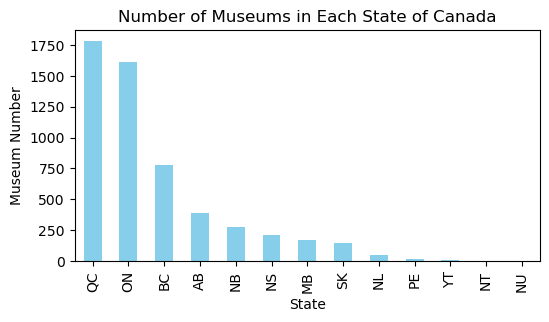

In [73]:
#Visualize the result with a bar plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
state_museum_count.plot(kind='bar', color='skyblue')
plt.title('Number of Museums in Each State of Canada')
plt.xlabel('State')
plt.ylabel('Museum Number')
plt.show()

# Question 2: Which category of museums has the largest number and what about the distribution?

In [74]:
#Count the number of each category
category_counts = museum_df['Category'].value_counts()
print(category_counts)

library or archives                     1979
museum                                  1326
gallery                                  743
theatre/performance and concert hall     457
heritage or historic site                439
festival site                            275
art or cultural centre                   161
artist                                    62
Name: Category, dtype: int64


In [75]:
#Find the most numerous category
most_common_category = category_counts.idxmax()
print(f"The category of museums with the largest number is: {most_common_category}")

The category of museums with the largest number is: library or archives


In [76]:
#Count the number of each category in each state
category_state_counts = museum_df.groupby(['State', 'Category']).size().reset_index(name='Numbers')

In [77]:
#Import seaborn for visualization
import seaborn as sns

<Axes: xlabel='State', ylabel='Numbers'>

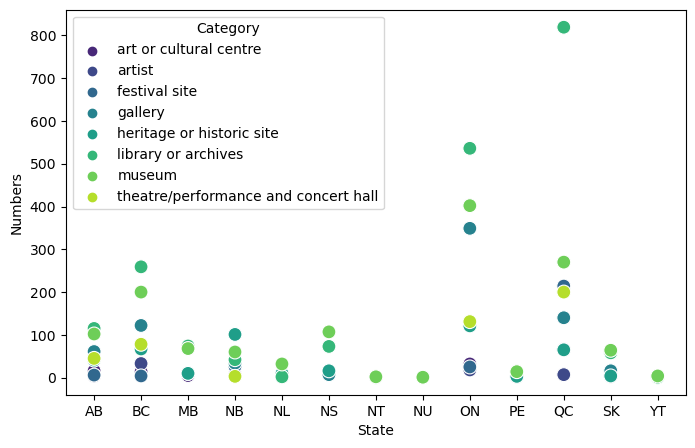

In [79]:
#Draw the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='State', y='Numbers', hue='Category', data=category_state_counts, s=100, palette='viridis', legend='full')